<style type="text/css">
    ol { list-style-type: upper-alpha; }
    p { text-align: center; font-weight: bold; }
</style>

<center>
  <img src=https://i.imgur.com/0TSSaqL.png width="550">
</center>
<center>
  <h3>
    <b>CAPSTONE</b><br/>
    <b>Predict H1N1 and Seasonal Flu Vaccines</b><br/>
    <b>GRUPO 3</b>
  </h3>
</center>

# Contexto

El objetivo es predecir si una persona fue vacunada con la vacuna H1N1 o gripe estacional, de acuerdo a información compartida acerca de su contexto, opinioes y comportamientos a nivel salud.

You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

*   `h1n1_concern` - Level of concern about the H1N1 flu.
  *   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
*   `h1n1_knowledge` - Level of knowledge about H1N1 flu.
  *   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
*   `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
*   `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
*   `behavioral_face_mask` - Has bought a face mask. (binary)
*   `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
*   `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
*   `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
*   `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
*   `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
*   `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
*   `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
*   `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
*   `health_worker` - Is a healthcare worker. (binary)
*   `health_insurance` - Has health insurance. (binary)
*   `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
  *   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
     1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `age_group` - Age group of respondent.
*   `education` - Self-reported education level.
*   `race` - Race of respondent.
*   `sex` - Sex of respondent.
*   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
*   `marital_status` - Marital status of respondent.
*   `rent_or_own` - Housing situation of respondent.
*   `employment_status` - Employment status of respondent.
*   `hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
*   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
*   `household_adults` - Number of other adults in household, top-coded to 3.
*   `household_children` - Number of children in household, top-coded to 3.
*   `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
*   `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.

# 1. Exploración del dataset

En esta fase vamos a cargar y preparar el dataset para realizar la fase EDA (Exploratory Data Analysis).

Primero importamos las librerías necesarias.

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Cargamos el dataset y exploramos su estructura y datos.

In [214]:
df = pd.read_csv('training_set_features_original.csv')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


El dataset tiene 26707 filas y 36 columnas.

In [215]:
df.shape

(26707, 36)

Tipos de datos por columna:

In [216]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# 2. Depuración de datos

En esta etapa vamos a evaluar la existencia de valores nulos y valores duplicados.

## Valores duplicados

No se encontraron datos duplicados.

In [218]:
df.duplicated(keep='first').sum()

0

## Valores nulos

In [219]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

Vamos a remover las columnas con un alto volumen de valores nulos que tienen datos irrelevantes.
*   `hhs_geo_region` no tiene nulos, pero tiene textos irrelevantes.
*   `employment_industry` (13330), los textos son irrelevantes.
*   `employment_occupation` (13470), los textos son irrelevantes.

También vamos a remover la columna respondent_id dado que no agrega datos valiosos, y es equivalente al index del dataset.


In [220]:
# Remove columns respondent_id, hhs_geo_region, employment_industry, employment_occupation with a high volume of null values and texts no relevant.
df.drop(['respondent_id'], axis=1, inplace=True)
df.drop(['hhs_geo_region'], axis=1, inplace=True)
df.drop(['employment_industry'], axis=1, inplace=True)
df.drop(['employment_occupation'], axis=1, inplace=True)

Text(0.5, 1.0, 'Missing Values Heatmap')

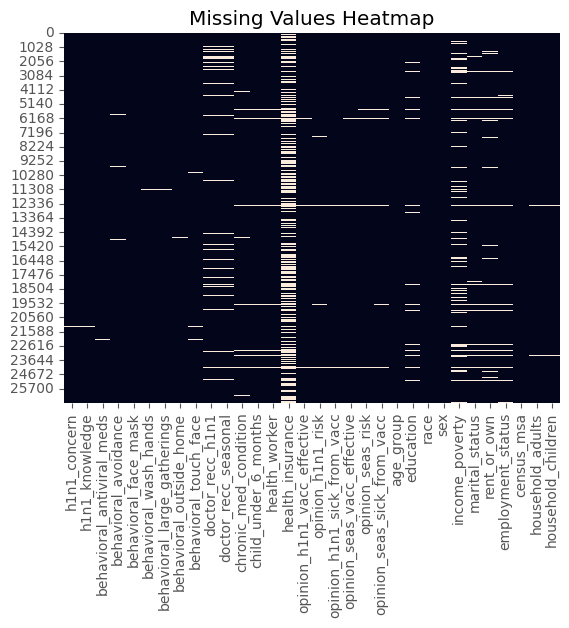

In [221]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing Values Heatmap")

In [222]:
df.shape

(26707, 32)

In [223]:
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

Tenemos varias variables categóricas binarias tipo 1/0. Solo en algunos pocos casos podríamos asumir que una "no respuesta" se puede poblar con la respueta negativa 0:
*   `doctor_recc_h1n1` **2160 valores nulos**. Indica si una vacuna h1n1 fue recomendada por el doctor.
*   `doctor_recc_seasonal` **2160 valores nulos**. Indica si una vacuna estacional fue recomendada por el doctor.
*   `health_worker` **804 valores nulos**. Indica si es un trabajador de la salud.
*   `health_insurance` **12274 valores nulos**. Indica si el encuestado tiene o no un seguro médico.




In [224]:
print("null ", df['doctor_recc_h1n1'].isnull().sum())
print(df['doctor_recc_h1n1'].value_counts())

null  2160
0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64


In [225]:
print("null ", df['doctor_recc_seasonal'].isnull().sum())
print(df['doctor_recc_seasonal'].value_counts())

null  2160
0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64


In [226]:
print("null ", df['health_worker'].isnull().sum())
print(df['health_worker'].value_counts())

null  804
0.0    23004
1.0     2899
Name: health_worker, dtype: int64


In [227]:
print("null ", df['health_insurance'].isnull().sum())
print(df['health_insurance'].value_counts())

null  12274
1.0    12697
0.0     1736
Name: health_insurance, dtype: int64


Poblamos los nulos de las variables categóricas binarias cuya no respuesta, se puede poblar con respuesta negativa 0:

In [228]:
df.loc[df["doctor_recc_h1n1"].isnull(), 'doctor_recc_h1n1'] = 0
df.loc[df["doctor_recc_seasonal"].isnull(), 'doctor_recc_seasonal'] = 0
df.loc[df["health_worker"].isnull(), 'health_worker'] = 0
df.loc[df["health_insurance"].isnull(), 'health_insurance'] = 0

In [229]:
df.isnull().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition           971
child_under_6_months            820
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

Text(0.5, 1.0, 'Missing Values Heatmap')

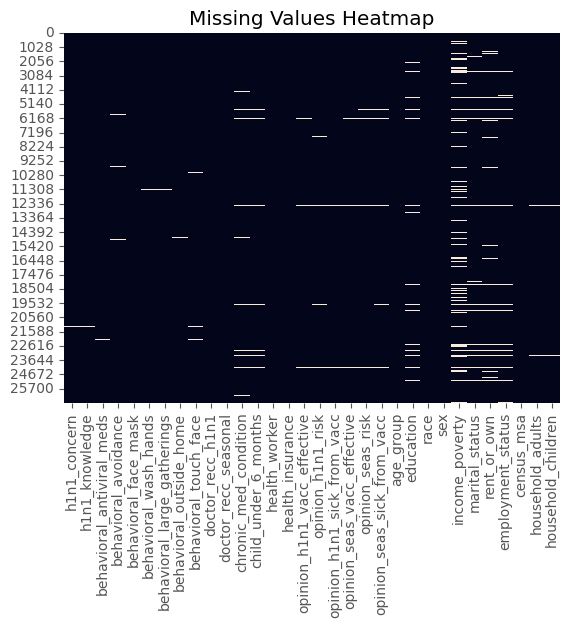

In [230]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing Values Heatmap")

# Distribución de los datos

En esta fase vamos a realizar diferentes visualizaciones del dataset, que nos van a permitir tener un conocimiento más profundo de los datos.

In [231]:
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,26707.000000,...,26707.000000,26707.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.202494,...,0.108548,0.475418,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.401866,...,0.311077,0.499405,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [232]:
df["sex"].value_counts(normalize=True)

Female    0.593777
Male      0.406223
Name: sex, dtype: float64

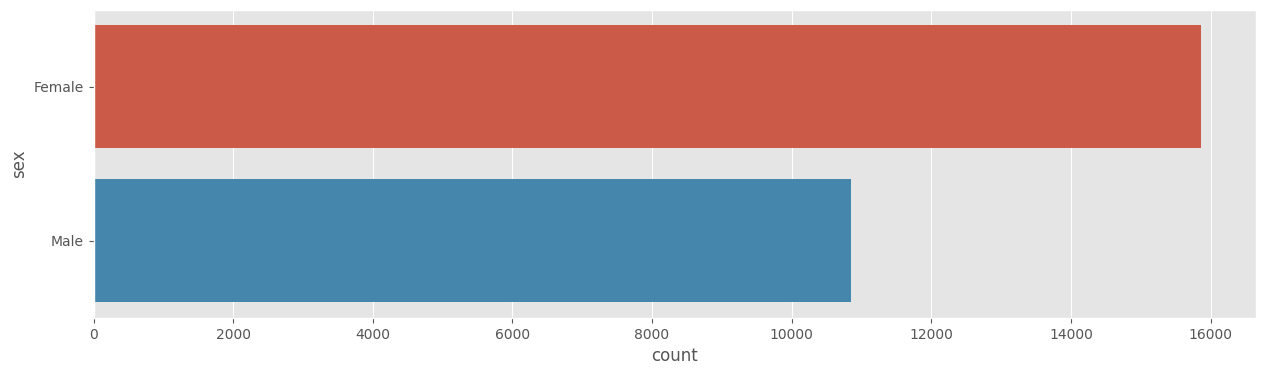

In [233]:
plt.style.use('ggplot')
plt.figure(1 , figsize = (15 , 4))
sns.countplot(y = 'sex' , data = df)
plt.show()

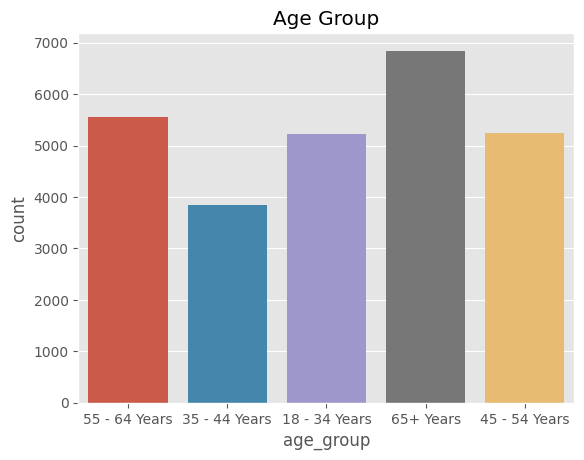

In [234]:
sns.countplot(x = df['age_group'])
plt.title("Age Group")
plt.show()

<Axes: title={'center': 'Age Group'}, ylabel='age_group'>

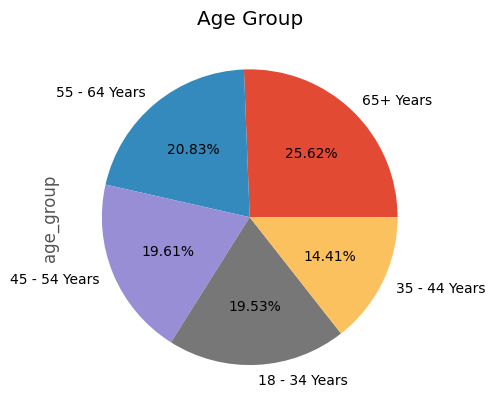

In [235]:
df['age_group'].value_counts().plot.pie(autopct = '%1.2f%%', title='Age Group')

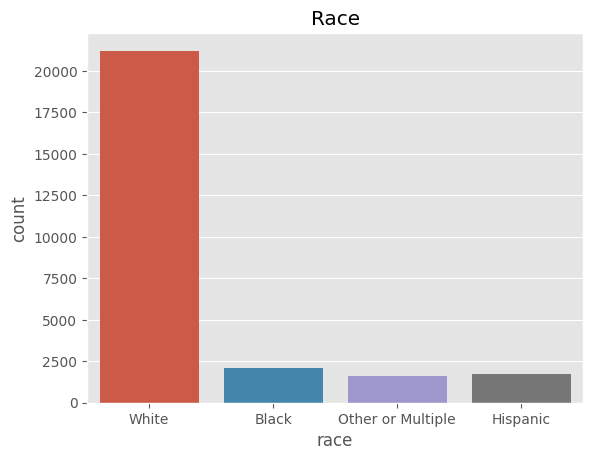

In [236]:
sns.countplot(x = df['race'])
plt.title("Race")
plt.show()

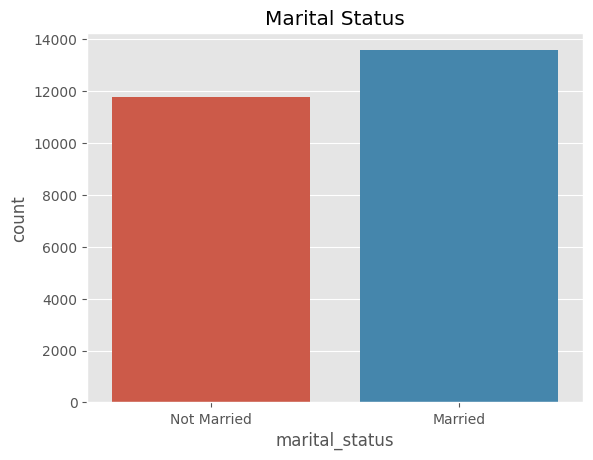

In [237]:
sns.countplot(x = df['marital_status'])
plt.title("Marital Status")
plt.show()

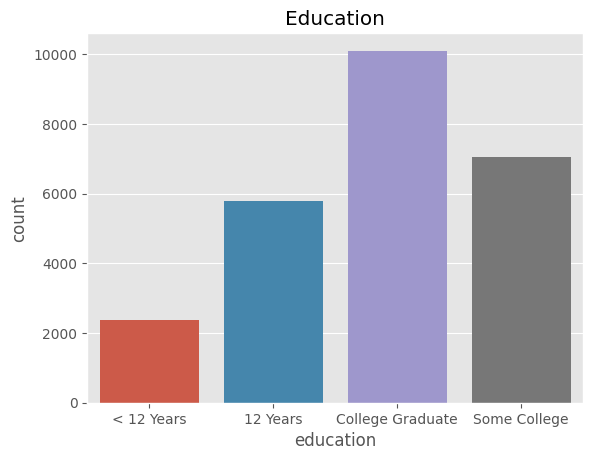

In [238]:
sns.countplot(x = df['education'])
plt.title("Education")
plt.show()

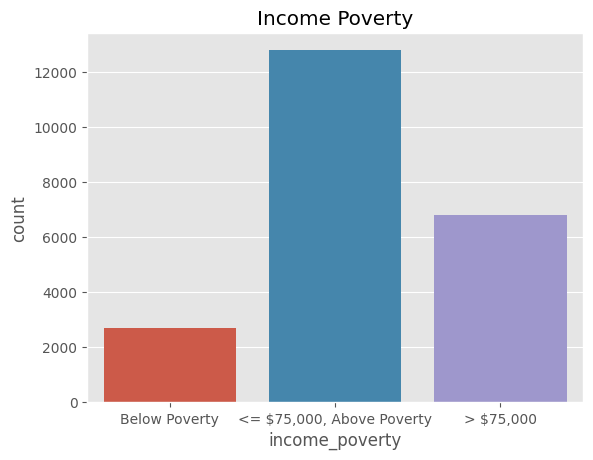

In [239]:
sns.countplot(x = df['income_poverty'])
plt.title("Income Poverty")
plt.show()

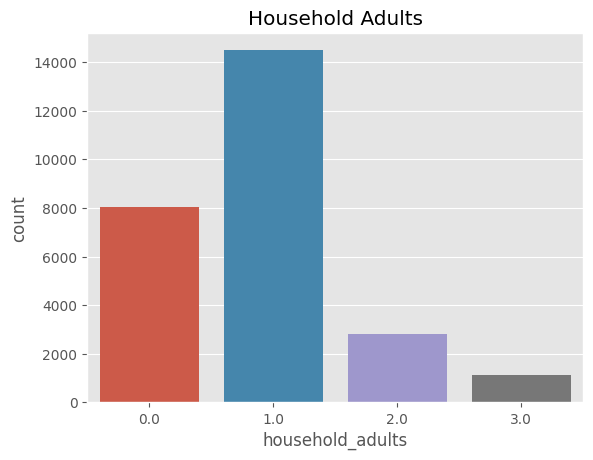

In [240]:
sns.countplot(x = df['household_adults'])
plt.title("Household Adults")
plt.show()

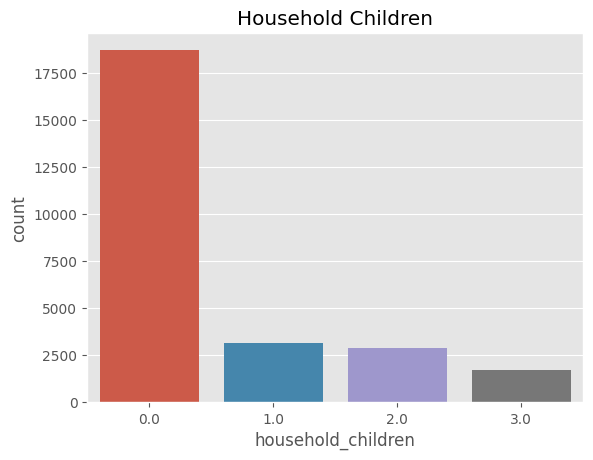

In [241]:
sns.countplot(x = df['household_children'])
plt.title("Household Children")
plt.show()

Por los gráficos anteriores, vemos que nuestra muestra de encuestados presenta las siguientes características:

1.   60% son mujeres, 40% hombres.
2.   El grupo de edad con más encuestados, es los mayores de 65 años, pero hay datos representativos para todos los grupos de edad.
3.   La muestra está centrada en personas de raza blanca.
4.   La muestra tiene personas casadas y no casadas de manera equilibrada.
5.   La mayoría de la muestra tiene un buen nivel de educación.
6.   La mayoría de la muestra tiene ingresos de clase media, y muy pocos tocan la línea de pobreza.
7.   La mayoría son parejas solas, sin hijos.



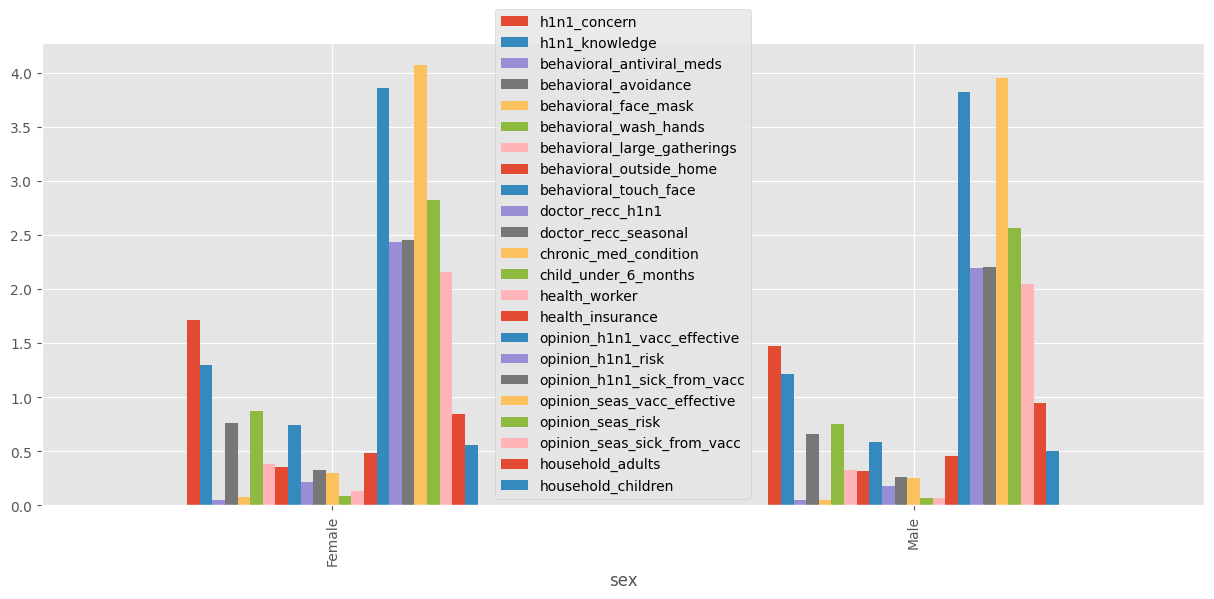

In [242]:
df.groupby('sex').mean().plot(kind='bar',figsize=(15,6));

Del gráfico anterior podemos observar que las respuestas están balanceadas por género, sin diferencias considerables en las respuestas a causa de ello.

Solo vemos algunos pocos valores mayores entre las mujeres, pero también se debe a que la población de mujeres es mayor.

Hay mayor preocupación por el H1N1 y más trabajadoras de la salud, entre las mujeres.

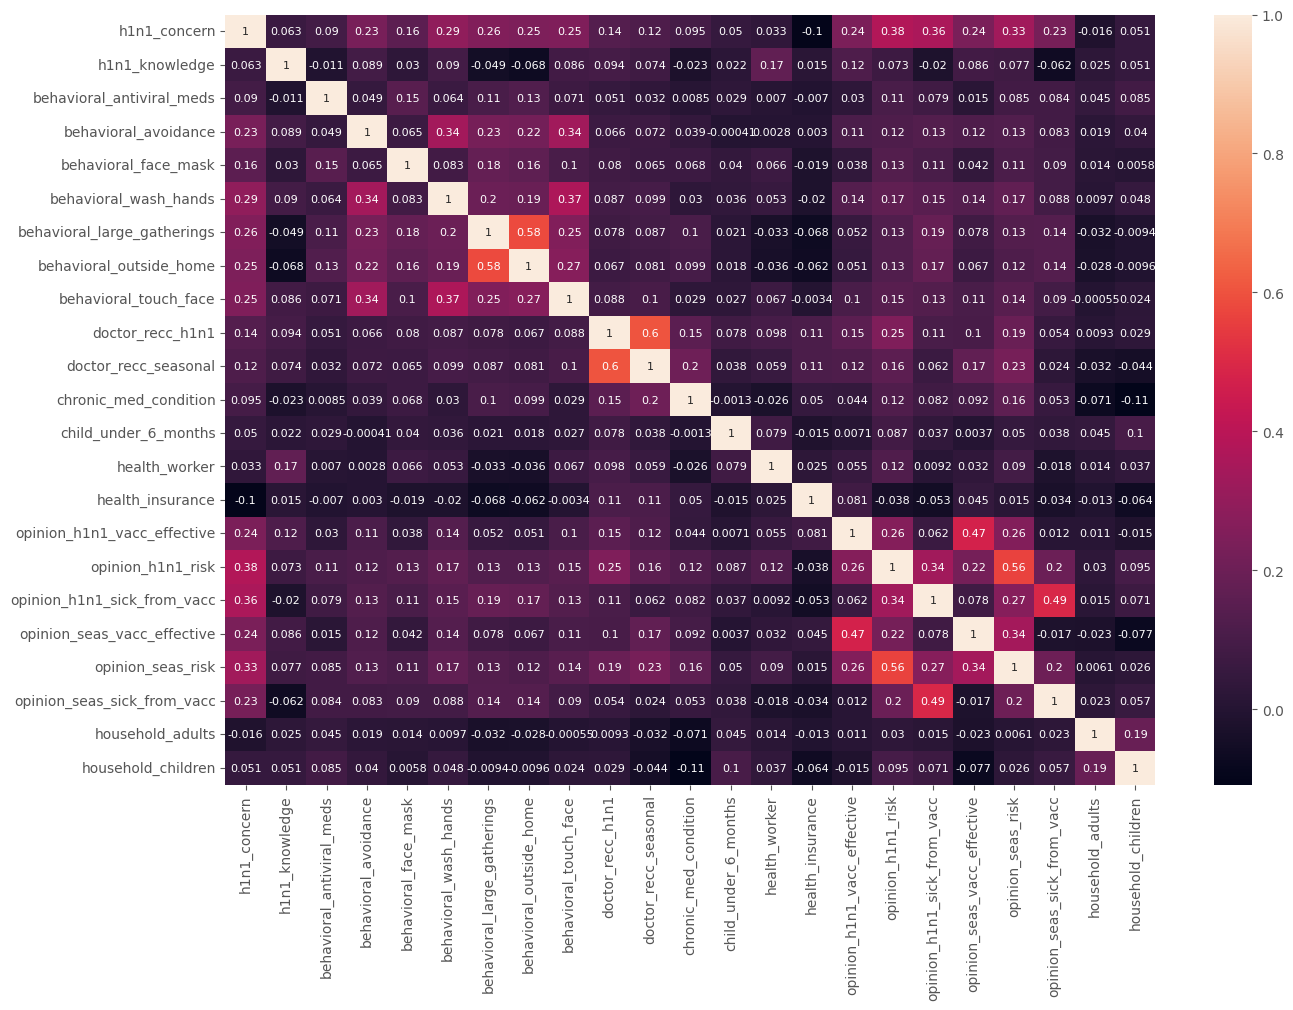

In [243]:
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"fontsize":8})
plt.show()

Del gráfico anterior podemos observar que no tenemos variables fuertemente correlacionadas entre sí.

Solo entre algunas que apuntan a capturar información similar, por ejemplo:


*   `behavioral_large_gatherings` con `behavioral_outside_home`
*   `doctor_recc_h1n1` con `doctor_recc_seasonal`
*   `opinion_h1n1_risk` con `opinion_seas_risk`



# Variables Categóricas

En esta fase vamos a reemplazar las variables categóricas a valores numéricos.

Las variables a reemplazar son:

1.   `age_group` - Age group of respondent.
2.   `education` - Self-reported education level.
3.   `race` - Race of respondent.
4.   `sex` - Sex of respondent.
5.   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
6.   `marital_status` - Marital status of respondent.
7.   `rent_or_own` - Housing situation of respondent.
8.   `employment_status` - Employment status of respondent.
9.   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.



In [244]:
df["age_group"].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [245]:
# age_group
df['age_group'].replace(['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'],
                        [1,2,3,4,5], inplace=True)

In [246]:
df["education"].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [247]:
# education
df['education'].replace(['< 12 Years','12 Years','Some College','College Graduate'],
                        [1,2,3,4], inplace=True)

In [248]:
df["race"].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [249]:
# race
df['race'].replace(['White','Black','Hispanic','Other or Multiple'],
                        [1,2,3,4], inplace=True)

In [250]:
df["sex"].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [251]:
# sex
df['sex'].replace(['Female','Male'],
                        [1,2], inplace=True)

In [ ]:
df["income_poverty"].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [252]:
# income_poverty
df['income_poverty'].replace(['Below Poverty','<= $75,000, Above Poverty','> $75,000'],
                        [1,2,3], inplace=True)

In [253]:
df["marital_status"].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [254]:
# marital_status
df['marital_status'].replace(['Married','Not Married'],
                        [1,2], inplace=True)

In [255]:
df["rent_or_own"].value_counts()

Own     18736
Rent     5929
Name: rent_or_own, dtype: int64

In [256]:
# rent_or_own
df['rent_or_own'].replace(['Own','Rent'],
                        [1,2], inplace=True)

In [257]:
df["employment_status"].value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [258]:
# employment_status
df['employment_status'].replace(['Unemployed','Not in Labor Force','Employed'],
                        [1,2,3], inplace=True)

In [259]:
df["census_msa"].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [260]:
# census_msa
df['census_msa'].replace(['Non-MSA','MSA, Not Principle  City','MSA, Principle City'],
                        [1,2,3], inplace=True)

Ahora que las variables categóricas han sido convertidas a valores numéricos, vamos a revisar de nuevo la distribución de los datos.

In [261]:
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,26707.000000,...,25300.000000,26707.000000,26707.000000,22284.000000,25299.000000,24665.000000,25244.000000,26707.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.202494,...,2.983162,1.391807,1.406223,2.184572,1.464208,1.240381,2.479599,2.024937,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.401866,...,1.000787,0.855512,0.491136,0.626562,0.498727,0.427324,0.603916,0.750581,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,4.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,4.000000,4.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000


Ahora, una vez que las variables categóricas son numéricas, vemos si existe correlación entre ellas.

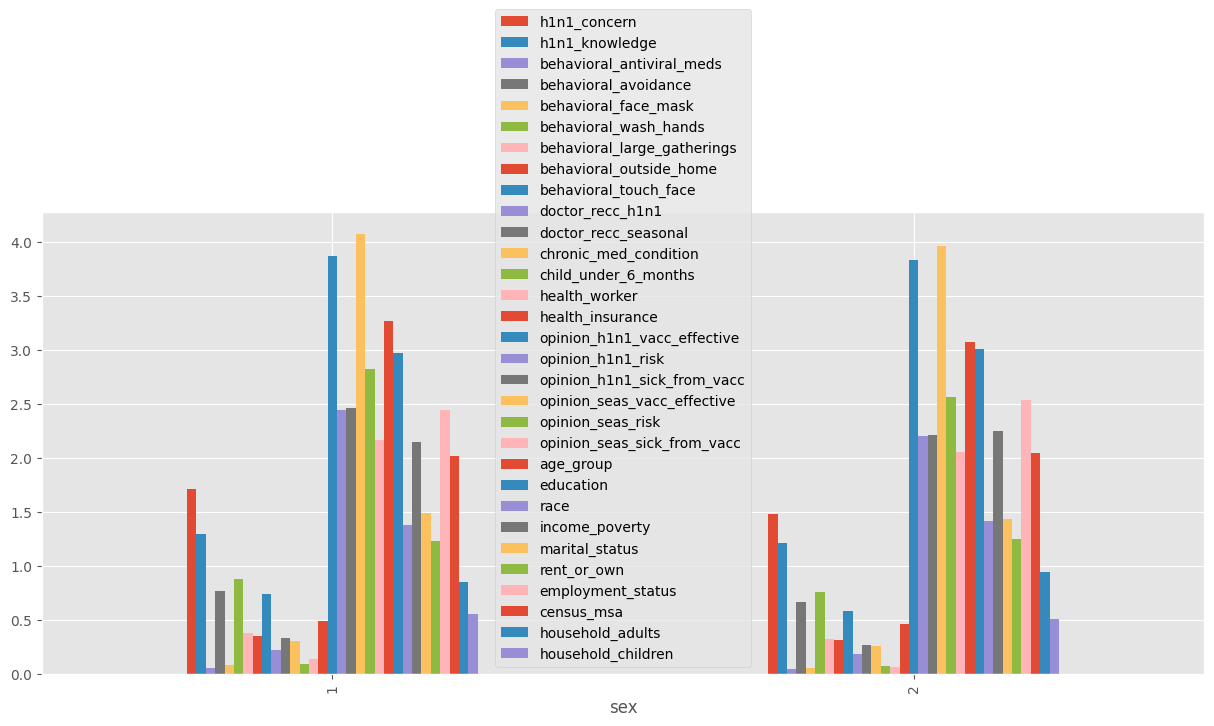

In [262]:
df.groupby('sex').mean().plot(kind='bar',figsize=(15,6));

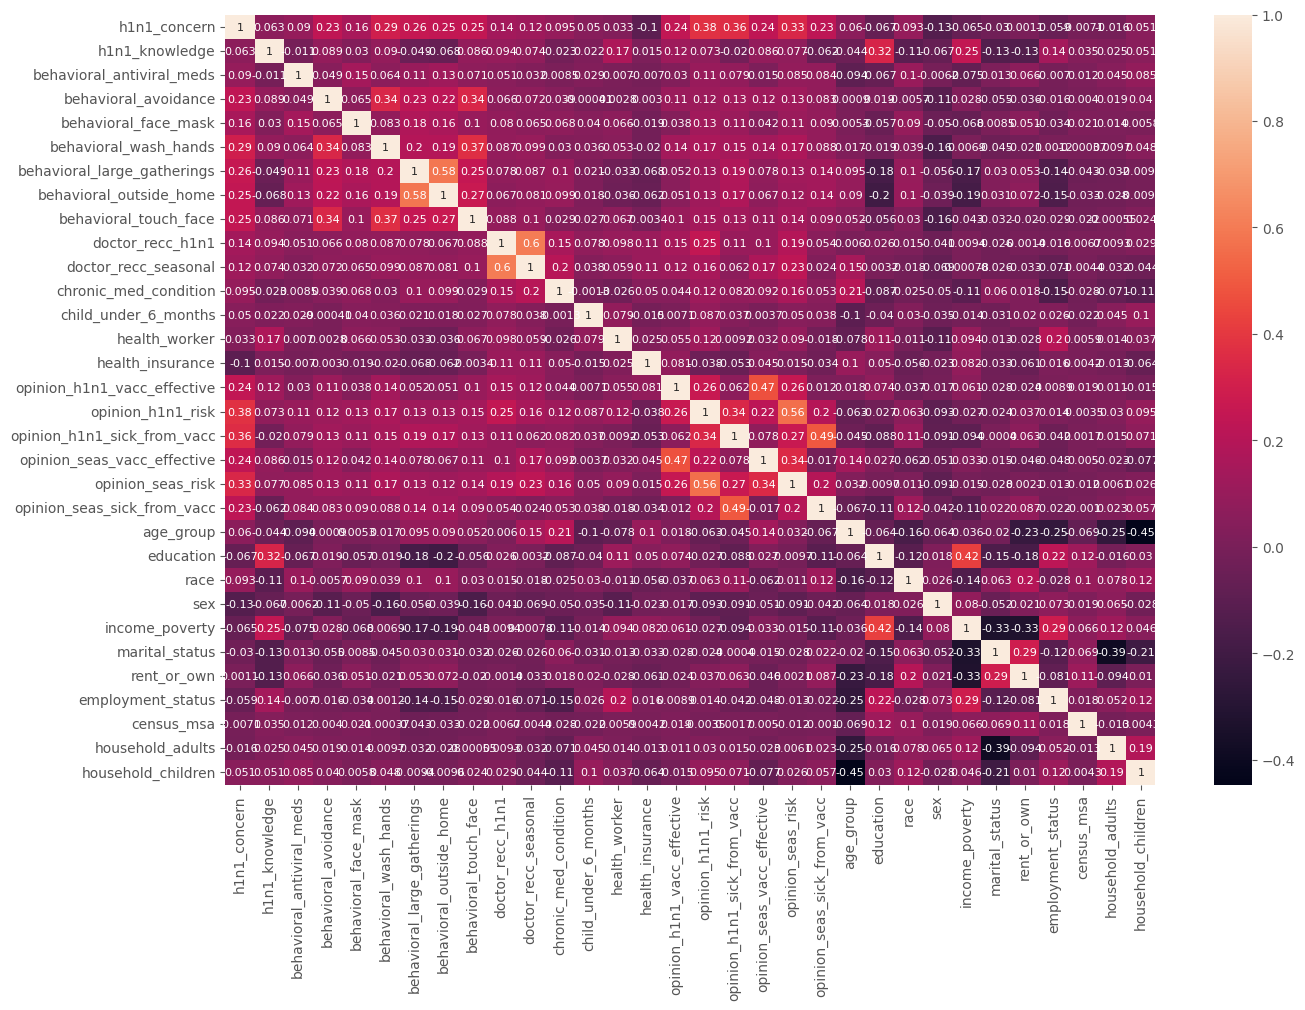

In [263]:
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"fontsize":8})
plt.show()

No vemos correlaciones fuertes tampoco al incluir las variables categóricas en el análisis.

# Análisis de Variables

En esta fase vamos a explorar la relación particular entre algunas variables.

Por los datos podemos observar que el nivel de preocupación por h1n1, crece propocionalmente al nivel de educación, y a un nivel mayor entre las mujeres.

In [264]:
df.groupby(['sex','education'])['h1n1_concern'].sum()

sex  education
1    1.0          2642.0
     2.0          6123.0
     3.0          7464.0
     4.0          9633.0
2    1.0          1509.0
     2.0          3541.0
     3.0          3677.0
     4.0          6235.0
Name: h1n1_concern, dtype: float64

El uso de mascarilla es bajo en general, al igual que el lavado de manos habitual.

In [265]:
df["behavioral_face_mask"].value_counts(normalize=True)

0.0    0.931018
1.0    0.068982
Name: behavioral_face_mask, dtype: float64

In [266]:
df["behavioral_wash_hands"].value_counts(normalize=True)

1.0    0.825614
0.0    0.174386
Name: behavioral_wash_hands, dtype: float64

A mayor grupo de edad, mayores casos de condiciones médicas crónicas.

In [267]:
df.groupby(['sex','age_group'])['chronic_med_condition'].sum()

sex  age_group
1    1             517.0
     2             468.0
     3             857.0
     4            1051.0
     5            1726.0
2    1             279.0
     2             237.0
     3             450.0
     4             701.0
     5            1004.0
Name: chronic_med_condition, dtype: float64

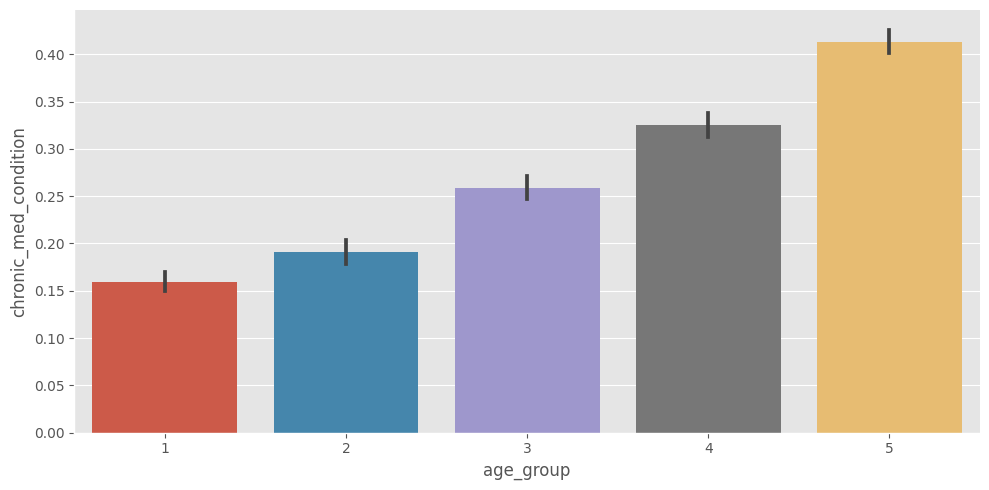

In [268]:
sns.catplot(x='age_group', y='chronic_med_condition', data=df, kind='bar', height=5, aspect=2)

El riesgo percibido de adquirir h1n1 por no tomar la vacuna es alto entre las mujeres, en especial en el grupo de mayor edad, pero entre los hombres se distribuye entre los grupos de edad.

In [269]:
df.groupby(['sex','age_group'])['opinion_h1n1_risk'].sum()

sex  age_group
1    1            7138.0
     2            5822.0
     3            7664.0
     4            7834.0
     5            9753.0
2    1            5234.0
     2            3561.0
     3            4530.0
     4            4962.0
     5            5156.0
Name: opinion_h1n1_risk, dtype: float64

El riesgo percibido de enfermar al tomar la vacuna h1n1, es igualmente mayor entre mujeres de mayor edad, y distribuido entre hombres.

In [271]:
df.groupby(['sex','age_group'])['opinion_h1n1_sick_from_vacc'].sum()

sex  age_group
1    1             7175.0
     2             5626.0
     3             7726.0
     4             7846.0
     5            10103.0
2    1             5134.0
     2             3630.0
     3             4705.0
     4             4967.0
     5             5123.0
Name: opinion_h1n1_sick_from_vacc, dtype: float64

Las opiniones sobre la efectividad de la vacuna h1n1 son en general altas.

In [272]:
df.groupby(['sex','age_group'])['opinion_h1n1_vacc_effective'].sum()

sex  age_group
1    1            10557.0
     2             8464.0
     3            12105.0
     4            12694.0
     5            16650.0
2    1             9000.0
     2             5963.0
     3             7844.0
     4             8699.0
     5             9357.0
Name: opinion_h1n1_vacc_effective, dtype: float64

# Dataset final

Por último, vamos a exportar el dataset resultado a un csv nuevo.

In [273]:
df.to_csv('training_set_features_eda.csv')